# CE 93: Engineering Data Analysis
# Lab 10: Regularized Regression

**Full Name:** *replace text here*

## Instructions 

Welcome to Lab 10! 

Please save your work after every question! At the end, you will have to submit your Jupyter Notebook as a PDF file in the bCourses quiz. The notebook should be consistent with your quiz answers. Not submitting a PDF file will result in a grade of 0 on the lab assignment. You will also receive a 0 if your answers to the quiz are inconsistent with your PDF.

If you see cells with "..." make sure to replace the "..." with your code even if they are not listed with a "Question". 
Please remember to label all axes with the quantity and units being plotted. 

Any part listed as a "<font color='red'>**Question**</font>" should be answered in the bCourses quiz to receive credit.

We will use the following Python packages:

* NumPy
* MatPlotLib
* pandas
* sklearn
* statsmodels.api
* random

## Load the required libraries 

The following code loads the required libraries. Run this cell first.

In [27]:
# import python library / packages 
import numpy as np                                 
import matplotlib.pyplot as plt                    
import pandas as pd                               
from sklearn.linear_model import LinearRegression,Ridge, Lasso  
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error, mean_absolute_error
import statsmodels.api as sm                       
import random                                     

## About this Lab

**Objective:**
In this lab, we delve into the realm of regularized regression using Python. Our goal is to develop models that can accurately predict house prices based on various features.

**Dataset Overview:**
We'll be working with a dataset detailing house sales in Windsor, Canada, specifically focusing on transactions from July to September 1987. This dataset encompasses 546 houses, providing a rich basis for our analysis.

**Lab Tasks:**
Throughout this lab, you will:

- Explore the influence of different factors on house prices.
- Implement and compare simple linear regression with regularized regression models (Lasso and Ridge).
- Utilize cross-validation techniques to find the optimal regularization parameter for both Lasso and Ridge regression.
- Determine which model most effectively predicts house prices, backed by data-driven insights.

**Learning Outcomes:** 
By the end of this lab, you will gain hands-on experience in:
- Building, fitting, and evaluating regression models.
- Understanding the intricacies of regularized regression and its practical applications.
- Harnessing cross-validation to enhance model performance.
- Drawing meaningful inferences about variable relationships in the context of real estate pricing.


## Sales Prices of Houses in the City of Windsor

The dataset you will be using to analyze house price is named "**1987_Housing_Price_dataset.csv**".
    
Let's load the provided data set `1987_Housing_Price_dataset.csv`. 

* load using the Pandas `pd.read_csv()` function. Drop the 1st column (i.e., `Unnamed: 0`)


|Variable|Type|Explanation|
|:-|:-|:-|
|price|float|sale price of a house|
|lotsize|float|the lot size of a property in square feet|
|bedrooms|integer|number of bedrooms|
|bathrms|integer|number of full bathrooms|
|stories|integer|number of stories excluding basement|
|driveway|categorical|does the house have a driveway? (yes/no)|
|recroom|categorical|does the house have a recreational room? (yes/no)|
|fullbase|categorical |does the house have a full finished basement? (yes/no)|
|gashw|categorical |does the house use gas for hot water heating? (yes/no)|
|airco|categorical |does the house have central air conditioning? (yes/no)|
|garagepl|integer|number of garage places|
|prefarea|categorical |is the house located in the preferred neighbourhood of the city? (yes/no)|

You will work with all the variables in this lab.

In [ ]:
# edit the code cell below to read the .csv file and print the first few rows of the data set. 
# If you do not know how to do this, refer to previous labs

# read a .csv file in as a DataFrame
df_raw = ...
df_raw = df_raw.drop(...)

# return the first 5 rows of the data set by default
...

## Data Exploration

We first check target variable house price (`price`) distribution. Add your code below to take the relevant column from the DataFrame you loaded above and save it as `house_price`.

<font color='red'>**Question 1.**</font> Create a **horizontal** box plot (i.e., everything is drawn horizontally) of `house_price` and calculate the skewness. What observations can you make based on the scatter plot? Select your answer(s) from the options in bCourses.

* Use the skew function from scipy.stats to calculate this(import the function by yourself) [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.skew.html)
* Use plt.boxplot [here](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.boxplot.html)

In [ ]:
# create variables
# replace ... with your code
house_price = ...

# calculate the skewness
...

# create box plot
...

Given the skewness observed in the `house_price` distribution, it's often beneficial to apply a transformation to reduce this skewness, especially when preparing data for linear regression models. A common technique is the logarithmic transformation.

Why **log(x+1)** Transformation?

- The logarithmic transformation, specifically **log(x + 1)**, helps in stabilizing the variance, normalizing the distribution, and reducing the effects of the outliers.
- The **+1** ensures that we don't take the logarithm of zero (as log(0) is undefined).
- This transformation is particularly useful when dealing with right-skewed data (where the tail on the right side of the distribution is longer or fatter than the left side).

Let’s transform the `house_price` using **log(x + 1)** and save it as log_price:Save the new variable as `log_price`.

<font color='red'>**Question 2.**</font> visualize the distributions of both `house_price` and `log_price` using histograms and Q-Q plots. What observations can you make based on the scatter plot? Select your answer(s) from the options in bCourses.
- Histograms will show the frequency distribution of the variables.
- Q-Q (Quantile-Quantile) plots will allow us to assess if the data follows a normal distribution. Points lying on the line in a Q-Q plot indicate that the data is normally distributed. Refer to Lab06 code for Q-Q plot if needed.

In [ ]:
log_price = ...

# plot histgram and Q-Q plot for house_price
...

# plot histgram and Q-Q plot for log_price
...

## Regression modeling

We will use the `scikit-learn` package to perform regression. There are other packages as well, but this is one of the most commonly used packages and is also a widely used Python library for machine learning, built on top of NumPy and some other packages. You will specifically use the class `sklearn.linear_model.LinearRegression`,`sklearn.linear_model.Lasso` and `sklearn.linear_model.Ridge` to perform linear and regularized regressions. You already loaded this class in the first code cell.



#### Review of regularized regression
We briefly review the idea of regularization as introduced in lecture. Recall that in the ordinary least squares problem we find the regression coefficients $\boldsymbol{\beta} \in \mathbb{R}^m$ that minimize the loss function

$$
L(\boldsymbol{\beta}) = \frac{1}{n} \sum_{i=1}^{n} \left| y_i - \boldsymbol{\beta}^T \mathbf{x}_i \right|^2.
$$

Recall that we have $n$ observations. Here, $y_i$ is the response variable for observation $i$ and $\mathbf{x}_i \in \mathbb{R}^m$ is a vector from the predictor matrix corresponding to observation $i$.

The general idea behind regularization is to penalize the loss function to account for possibly very large values of the coefficients $\boldsymbol{\beta}$. Instead of minimizing $L(\boldsymbol{\beta})$, we minimize the regularized loss function

$$
L_{\text{reg}}(\boldsymbol{\beta}) = L(\boldsymbol{\beta}) + \lambda R(\boldsymbol{\beta})
$$

where $R(\boldsymbol{\beta})$ is a penalty function and $\lambda$ is a scalar that weighs the relative importance of this penalty. In this lab we will explore one regularized regression model: *ridge regression*. In ridge regression, the penalty function is the sum of the squares of the parameters, which is written as

$$
L_{\text{ridge}}(\boldsymbol{\beta}) = \frac{1}{n} \sum_{i=1}^{n} \left| y_i - \boldsymbol{\beta}^T \mathbf{x}_i \right|^2 + \lambda \sum_{j=1}^{m} \beta_j^2.
$$

In lecture, you also learned about *LASSO regression* in which the penalty function is the sum of the absolute values of the parameters. This is written as,

$$
L_{\text{LASSO}}(\boldsymbol{\beta}) = \frac{1}{n} \sum_{i=1}^{n} \left| y_i - \boldsymbol{\beta}^T \mathbf{x}_i \right|^2 + \lambda \sum_{j=1}^{m} |\beta_j|.
$$

In this lab, we will show how these optimization problems can be solved with `sklearn` to determine the model parameters $\boldsymbol{\beta}$. We will also show how to choose $\lambda$ appropriately via cross-validation.


### Step 1: Data Processing

Proper data formatting is crucial before we begin our regression analysis. To prepare our dataset, we need to follow these steps:

1. **Check for Missing Values:**  
   Ensure there are no missing values in our dataset that could skew our analysis. Handle any missing data appropriately, either by imputation or by removing the affected records.

2. **Encode Categorical Variables:**  
   Convert categorical features into one-hot numeric features, also known as dummy variables. This step is essential for models that only accept numerical input.

3. **Prepare Feature Matrix:**  
   Remove the outcome variable (`price`) and any original categorical columns that have been one-hot encoded to prevent redundancy in our feature matrix. Also remove the the dummy variables after one-hot encoded for `xxx_no` type (e.g. `'driveway_no'`)

4. **Create Labels:**  
   Generate our label vector `y` by applying the `log(x+1)` transformation to the `price` column, resulting in `log_price`. This will be our target variable for regression models.

<font color='red'>**Question 3.**</font> Does there exist any missing value in any variable? How many variables in the dataframe after the one-hot encodeing in substep 2? Select your answer(s) from the options in bCourses.

Execute the following Python code cell to complete the data processing steps:

In [ ]:
'''
1. Check whether there exists missing value
'''
# dataframe.isnull().sum(): https://pandas.pydata.org/docs/reference/api/pandas.isnull.html

...

In [ ]:
'''
2. Encode our categorical features as one-hot numeric features (dummy variables)
'''
# example function:
# categorical_features = ['driveway', 'recroom', ...] # Add all categorical feature names
# data = pd.get_dummies(dataframe, columns=categorical_features)

# dictionary link: https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html

categorical_features = ...
data = ... 

In [ ]:
'''
3. Drop the column with the outcome variable (`price` ), and categorical columns for which we already created dummy variables
4. create our label y `log_price` 
'''
# Remove the redundant variables; Separate the feature matrix (X) and target vector (y)
drop_var_lst = [...]
X = data.drop(drop_var_lst, axis=1)
y = ...

### Step 2: Split Data

Once our dataset is properly formatted, the next step is to divide it into a training set and a test set. This is a critical part of model validation, allowing us to assess the model's performance on unseen data, thus gauging its generalization ability.

**Why Split the Data?**
- **Training Set:** Used to fit and train the model. It's the data that the algorithm uses to learn the relationship between features and the target variable.
- **Test Set:** Used to evaluate the model's predictions. It acts as a new set of data for the model and helps provide an unbiased evaluation.

We will allocate the first 90% of the data for training and the remaining 10% for testing. This ratio ensures that we have sufficient data to train our model while still having enough data points to test its predictions. 

To perform the split, we'll use the `train_test_split` function from `sklearn.model_selection` [here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

- ensuring reproducibility by setting a random state: **`random_state=36`**

<font color='red'>**Question 4.**</font> Calculate the standard deviation of y_train and y_test. Select your answer(s) from the options in bCourses.

Here's the Python code to split the dataset:


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
                                                    ...
                                                    )
# Calculate the standard deviation for y_train and y_test
...

# Output the standard deviations
print(f"Standard Deviation of y_train: {...}")
print(f"Standard Deviation of y_test: {...}")

### Step 3: Standardization of Numerical Features
The effectiveness of Lasso regression, as with many other predictive models, is heightened when all numerical features are normalized. This means that each feature should have a mean of zero and a similar variance. Without standardization, features with larger variances can disproportionately influence the model, potentially overshadowing more subtle yet important patterns.

**Why Standardize?**

- **Centering**: Subtracting the mean from each observation ensures that the features are centered around zero.
- **Scaling**: Dividing by the standard deviation scales the features so that they have unit variance.
This process produces what is known as a z-score, which represents the distance of an observation from the mean in terms of standard deviations. The formula for calculating the z-score of an observation $x$ is given by:

$$z=\frac{x-\bar{x}}{s}$$
 
where:

* $x$ is an individual observation.
* $\bar{x}$ is the mean of the feature.
* $s$ is the standard deviation of the feature.

**Important Notes**
* Data Leakage: standardization should be conducted post-split, using only the training data to avoid data leakage. This means the mean and standard deviation used for scaling should be derived from the training set only and then applied to the test set.
* We do not standardize categorical variables, especially not dummy variables (which only take on the values of 0 or 1), as this would not be meaningful.

Here we will 
1. Method 1: Manual Standardization. This method involves manually calculating the mean and standard deviation and applying the standardization formula. Use copty of X_train and X_test in this method. (`X_train_1 = X_train.copy()`; `X_test_1 = X_test.copy()`)
2. Method 2: Using `StandardScaler` from `sklearn.preprocessing`.The `StandardScaler` ([here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)) automates the standardization process and ensures that it's done correctly and efficiently. We will use the standardized `X_train` and `X_test` from Method 2 for the ongoing model training. 

   <font color='red'>**Question 5.**</font> What are the values of mean and std of variables `lotsize` and `garagepl` in **test set** after standardization in method 1. Are the results from method 1 consistent with method 2 in general? Select your answer(s) from the options in bCourses.
   * use `DaraFrame.describe()` to check the statistics 
   

In [ ]:
'''
Method 1: 
'''
numerical_features_lst = [...]
X_train_1 = X_train.copy()
X_test_1 = X_test.copy()

train_mean = ...
train_std = ...
X_train_1[numerical_features_lst]= ...
X_train_1[numerical_features_lst].describe()

In [ ]:
X_test_1[numerical_features_lst]= ...
X_test_1[numerical_features_lst].describe()

In [81]:
'''
Method 2: 
(make sure you only run this cell once)
'''
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(...) 

X_train[numerical_features] = scaler.transform(X_train[numerical_features])
X_test[numerical_features] = ...

### Step 4.1: Fit Linear Regression

Next, we'll build a linear regression model to understand the relationship between our predictors and the target variable. For this, we'll use the `statsmodels` library, which provides extensive statistical modeling options.

**Building the Model with `statsmodels`:**

`statsmodels` does not include an intercept in its regression models by default. In many cases, including an intercept is essential for a linear regression model to provide an accurate prediction when all predictors are equal to zero. Here's how to include an intercept and fit the model using `statsmodels`: if you are trying to perform a linear regression between `x` and `y`, you should follow these steps:
1. `x2 = sm.add_constant(x) # to include intercept in regression`
2. `model2 = sm.OLS(y,x2)`
3. `model2.summary()`
4. `model2.predict(x2)`

**Evaluate the Model:**

<font color='red'>**Question 6.**</font> Once you have fitted the model and made predictions, it's time to evaluate its performance. Calculate the Root Mean Squared Error (RMSE), and Mean Absolute Error (MAE) for both the training and test sets. These metrics will help you understand the average magnitude of errors in your predictions. Select your answer(s) from the options in bCourses.
 * use `mean_squared_error`, `mean_absolute_error` functions from `sklearn.metrics`

In [ ]:
# add your code here
...

In [ ]:
y_fit =  ...
y_predict= ...

print('RMSE train:', mean_squared_error(y_train, y_fit, squared = False))
print('RMSE test:', mean_squared_error(y_test, y_predict, squared = False))
print('MAE train:', mean_absolute_error(y_train, y_fit))
print('MAE test:', mean_absolute_error(y_test, y_predict))

### Step 4.2: Fit Ridge Regression

Now, let's move on to Ridge regression, which is a type of regularized linear regression that includes a regularization parameter $\alpha$ to prevent overfitting. This parameter controls the magnitude of the penalty term added to the loss function and helps in dealing with multicollinearity by allowing for some bias in exchange for a lower variance in the prediction.

**Applying Ridge Regression:**

We will use the `Ridge` class from `sklearn.linear_model`. Start by initializing a Ridge regressor with an $\alpha$ value of 1, which represents a starting point for the regularization strength.

Here's how to set up and fit a Ridge regression model using `sklearn`[here](https://scikit-learn.org/0.16/modules/generated/sklearn.linear_model.Ridge.html). For example, if you are trying to perform a Ridge regression between `x` and `y`, you should follow these steps:

1. `Ridge(alpha=1,fit_intercept=True)`
2. `ridge.fit(x,y)`
3. `ridge.predict(x)`
4. `ridge.coef_`



<font color='red'>**Question 7.**</font> Once you have fitted the model and made predictions, calculate the RMSE, and MAE for both the training and test sets. Select your answer(s) from the options in bCourses.
 * use `mean_squared_error`, `mean_absolute_error` functions from `sklearn.metrics`

In [ ]:
# add your code here
ridge = ...
y_fit = ...
y_predict= ...

print('RMSE train:', mean_squared_error(y_train, y_fit, squared = False))
print('RMSE test:', mean_squared_error(y_test, y_predict, squared = False))
print('MAE train:', mean_absolute_error(y_train, y_fit))
print('MAE test:', mean_absolute_error(y_test, y_predict))

### Step 4.3: Understanding the Impact of Regularization Strength

Regularization strength, denoted by $\alpha$, plays a critical role in Ridge regression. It influences the model by controlling the complexity of the coefficient estimates. To better comprehend this effect, we will visualize how the coefficients of our predictive variables change as we adjust $\alpha$.

**Interpreting the Role of Alpha:**
- When $\alpha = 0$, Ridge regression yields the same coefficients as a standard linear regression.
- As $\alpha$ increases, the impact of the regularization term grows, and the model coefficients tend to shrink towards zero.
- With a very large $\alpha$, the regularization effect dominates, driving all coefficients towards zero, resulting in a model with minimal predictive power (the null model).

This behavior is crucial for understanding the balance between bias and variance, as well as the concept of model complexity.

**Visualizing Coefficient Estimates:**

The provided code block automatically calculates and plots the Ridge regression coefficients for a range of $\alpha$ values. **No changes** are needed from your side; simply run the code and observe the plot.

<font color='red'>**Question 8.**</font> Examine the plot generated by the code below. As $\alpha$ increases, how do the coefficients of the model change? What does this suggest about the effect of regularization on the model's complexity? Use the visual cues from the plot and the theoretical implications of Ridge regression to interpret the relationship between $\alpha$ and the estimated coefficients.


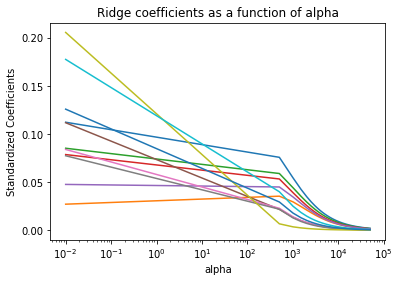

In [99]:
alphas = np.linspace(0.01,50000,100)
ridge = Ridge(max_iter=1000)
coefs = []

for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(X_train, y_train)
    coefs.append(ridge.coef_)

ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('Standardized Coefficients')
plt.title('Ridge coefficients as a function of alpha');


### Step 5: Regularized Regression with Optimal Alpha

Selecting the optimal regularization parameter, $\alpha$, is crucial for the performance of our Ridge and Lasso regression models. To determine the best value of $\alpha$, we will utilize cross-validation, which allows us to assess how the models perform on different subsets of the training data. In this case, we'll perform **5-fold** cross-validation, which partitions the training data into five equal-sized subsamples, using four for training and one for validation, and iterates this process five times.

**Cross-Validation Methodology:**

- **k-fold Cross-Validation:** Divides the training data into `k` subsets. Each time, we train the model on `k-1` folds and validate it on the remaining fold. This process is repeated `k` times.
- **Objective:** We aim to minimize the cross-validation Root Mean Squared Error (RMSE), which provides a measure of how well the model predicts the target variable on unseen data.

**Defining the RMSE Function:**

The function `rmse_cv` computes the cross-validation RMSE for a given model:

```python
from sklearn.model_selection import cross_val_score

def rmse_cv(model, X, y):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=5))
    return rmse.mean()
```

- The cross_val_score function estimates the scoring metric, in this case, the negative mean squared error, for each fold.
- We take the square root of the negated scores to obtain RMSE, which is more interpretable as it is on the same scale as the target variable.

In [105]:
def rmse_cv(model, x,  y):
    rmse= np.sqrt(-cross_val_score(model, x, y, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)

#### Model 1: Ridge model

The main tuning parameter for the Ridge model is alpha - a regularization parameter that measures how flexible our model is. The higher the regularization the less prone our model will be to overfit. However it will also lose flexibility and might not capture all of the signal in the data. Now we apply Cross-validation: we will use the provided rmse_cv function to evaluate the Ridge regression model over a range of $\alpha$ values and determine the best one:

In [113]:
model_ridge = Ridge()

# create a list of candidate alpha values 
alphas = np.linspace(0,10,41)

# return the list of average rmse for each alpha value in alphas
cv_ridge = [rmse_cv(Ridge(alpha = alpha),X_train,  y_train).mean() 
            for alpha in alphas] 
cv_ridge = pd.Series(cv_ridge, index = alphas)

**Task Breakdown:**

1. **Find the Optimal Alpha:**
   Determine the value of $\alpha$ that results in the lowest RMSE during cross-validation. This is your model's optimal complexity level that balances bias and variance effectively.
2. **Plot RMSE Across Different Alphas:**
Visualize how RMSE changes as we adjust $\alpha$. This helps us understand the impact of regularization strength on model performance
3. **Retrain and Evaluate the Model:**
With the optimal $\alpha$ determined, retrain the Ridge model on the full training set and assess its performance on both the training and test sets.


<font color='red'>**Question 9.**</font> Based on the  model's performance, select your answer(s) from the options in bCourses.

<font color='red'>**Question 10.**</font> Upload the plot for **RMSE Across Different Alphas** for Ridge model

In [ ]:
'''
Find the Optimal Alpha:
'''
ridge_best_alpha = ...

In [ ]:
'''
Plot RMSE Across Different Alphas:
'''
# put your code here
...


In [ ]:
'''
Retrain and Evaluate the Model
'''
m_ridge = ...
y_fit = ...
y_predict= ...

print('RMSE train:', mean_squared_error(y_train, y_fit, squared = False))
print('RMSE test:', mean_squared_error(y_test, y_predict, squared = False))
print('MAE train:', mean_absolute_error(y_train, y_fit))
print('MAE test:', mean_absolute_error(y_test, y_predict))

#### Model 2: Lasso model
Repeat tasks 1-3 for Lasso model

<font color='red'>**Question 11.**</font> Based on the lasso model's performance, select your answer(s) from the options in bCourses.

<font color='red'>**Question 12.**</font> Upload the plot for **RMSE Across Different Betas** for Lasso model

In [117]:
model_lasso = Lasso()
betas = np.linspace(0.0001, 0.0005, 16)
cv_lasso = [rmse_cv(Lasso(alpha=beta),X_train, y_train).mean() 
            for beta in betas]
cv_lasso = pd.Series(cv_lasso , index = alphas)

In [ ]:
'''
Find the Optimal beta:
'''
lasso_best_beta = ...

In [ ]:
'''
Plot RMSE Across Different Betas:
'''
# put your code here
...


In [ ]:
'''
Retrain and Evaluate the Model
'''
m_lasso = ...
y_fit = ...
y_predict= ...

print('RMSE train:', mean_squared_error(y_train, y_fit, squared = False))
print('RMSE test:', mean_squared_error(y_test, y_predict, squared = False))
print('MAE train:', mean_absolute_error(y_train, y_fit))
print('MAE test:', mean_absolute_error(y_test, y_predict))

### Step 6: Model Comparison and Selection

After training our linear, Lasso, and Ridge regression models, it's time to compare their performances to determine which one provides the best predictions on our test set. We will use the RMSE of the testing set as our comparison metric, as it gives us a clear indication of the average prediction error made by each model.

**Evaluating Model Performance:**

- **Linear Regression:** Evaluate the RMSE on the test set.
- **Lasso Regression:** Evaluate the RMSE on the test set using the model with the optimal $\alpha$ found via cross-validation.
- **Ridge Regression:** Similarly, evaluate the RMSE on the test set using the Ridge model with the optimal $\alpha$.

**Selecting the Best Model:**

<font color='red'>**Question 13.**</font> Compare the RMSE values for the testing set across all three models: linear regression, Lasso regression, and Ridge regression. Which model achieves the lowest RMSE on the test set, indicating the highest predictive accuracy?


**Considerations:**

Keep in mind that while RMSE is a useful measure of model accuracy, it's not the only metric to consider when evaluating model performance. In practice, it's also important to consider the complexity of the model, the interpretability of the coefficients, and how well the model meets the assumptions of linear regression.


## Submit your work!

<font color='red'>**Question 14.** </font> Submit your PDF file.

I recommend that you save your .ipynb file and keep a copy of it so that you can refer to it in the future (e.g., when working on the project). 

Once done with answering ALL questions and you are ready to submit the quiz, follow these steps:

1. Run all cells in the notebook. You can do this by going to Cell > Run All. This makes sure that all your visuals and answers show up in the file you submit.

2. Then, go to "File > Download as > PDF via LaTex(.pdf)" to generate a PDF file. Name the PDF file with your last name "Lastname.pdf". 

3. If you have trouble generating the PDF file, go to "File > Download as > PDF via HTML(.html)" (last option in the drop down menu). Even if you click on PDF via HTML(.html), make sure that the downloaded file is '.pdf'.

3. If you are using your own Python environment and are have trouble generating the PDF file from Jupyter notebook, use [datahub.berkeley.edu](http://datahub.berkeley.edu). Log in with your CalNet credentials. Upload the ipynb file with your outputs and results to Juptrer. Then follow step 2.

4. Upload the PDF file to the bCourses quiz (more instructions there).


**Not submitting a PDF file will result in a grade of 0 on this lab assignment.**
**You will also receive a 0 if your answers to this quiz are inconsistent with your PDF.**